In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from task_3_core.som import SOM 

from setup import get_task_data

EPOCHS = 100

In [2]:
df = pd.read_csv(get_task_data('Iris.csv'))
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
118,119,7.7,2.6,6.9,2.3,Iris-virginica
20,21,5.4,3.4,1.7,0.2,Iris-setosa
133,134,6.3,2.8,5.1,1.5,Iris-virginica
26,27,5.0,3.4,1.6,0.4,Iris-setosa
43,44,5.0,3.5,1.6,0.6,Iris-setosa


In [3]:
labels = df['Species']

df = df.drop(['Species', 'Id'], axis=1)
df = (df - df.min()) / (df.max() - df.min())
df['Species'] = labels

df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
138,0.472222,0.416667,0.644068,0.708333,Iris-virginica
94,0.361111,0.291667,0.542373,0.500000,Iris-versicolor
110,0.611111,0.500000,0.694915,0.791667,Iris-virginica
126,0.527778,0.333333,0.644068,0.708333,Iris-virginica
44,0.222222,0.750000,0.152542,0.125000,Iris-setosa


In [4]:
def plot_map(som, data):
    fig, ax = plt.subplots(figsize=(5, 5))

    class_styles = {
        'Iris-setosa' : 's',
        'Iris-versicolor': '*',
        'Iris-virginica': 'v',
    }

    for flower in class_styles:
        points_xs = data[data['Species'] == flower]['SepalLengthCm'].to_numpy()
        points_ys = data[data['Species'] == flower]['PetalLengthCm'].to_numpy()

        ax.scatter(points_xs, points_ys, marker=class_styles[flower])


    nodes = list(map(lambda n: list(n.position), som.nodes))
    nodes_xs = [x for x, _ in nodes]
    nodes_ys = [y for _, y in nodes]

    ax.scatter(nodes_xs, nodes_ys, color='black', s=3)

    for node in som.nodes:
        start_pos = list(node.position)
        for neighbor in node.neighbors:
            end_pos = list(neighbor.position)
            plt.plot(*np.transpose([start_pos, end_pos]), color='black')

    plt.show()

Kohonen map can be used as a clusterizer or as a non-linear analogue of PCA. 

It will be shown as a clusterizer on a subset of 2D data with visual representation and as a mapping on full 4D data of iris dataset and then analyzed in terms of mapping quality.  

In [5]:
subset_2d = df[['SepalLengthCm', 'PetalLengthCm', 'Species']]

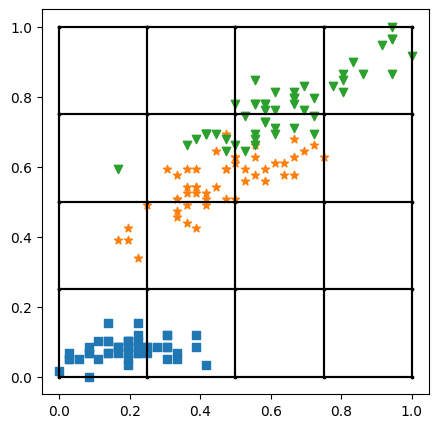

In [6]:
kohonen_map_2d = SOM((5, 5), 2, a0=0.025, s0=0.1)
plot_map(kohonen_map_2d, subset_2d)

In [7]:
input_data = subset_2d.drop('Species', axis=1)
input_data.sample(5)

,SepalLengthCm,PetalLengthCm
53,0.333333,0.508475
81,0.333333,0.457627
10,0.305556,0.084746
41,0.055556,0.050847
130,0.861111,0.864407


In [8]:
kohonen_map_2d.train(input_data.to_numpy(), len(input_data) * EPOCHS)

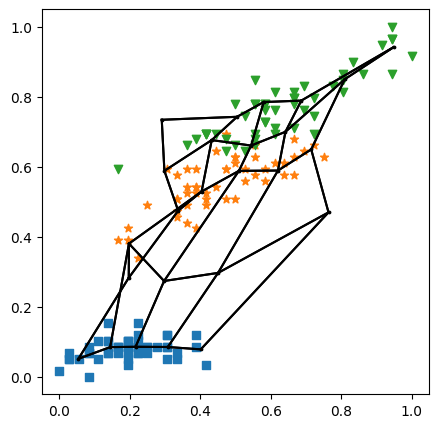

In [9]:
plot_map(kohonen_map_2d, subset_2d)

In [10]:
kohonen_map_2d.score()

Quantization error: 0.002205585853419121
Topographic error: 0.0


Tuning for best shape:

In [11]:
for x in range(2, 11):
    kohonen_map = SOM((x, x), 2, a0=0.025, s0=0.5 / x)
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    print(f'{x}:')
    kohonen_map.score()
    print('\n\n')

2:
Quantization error: 0.02577979145025158
Topographic error: 0.0


3:
Quantization error: 0.00812609499372691
Topographic error: 0.0


4:
Quantization error: 0.0033942918514092662
Topographic error: 0.0


5:
Quantization error: 0.002196471022858436
Topographic error: 0.0


6:
Quantization error: 0.001829098290689493
Topographic error: 0.0


7:
Quantization error: 0.0013724212713887689
Topographic error: 0.0


8:
Quantization error: 0.00119028467953815
Topographic error: 0.0


9:
Quantization error: 0.0009829393014396356
Topographic error: 0.0


10:
Quantization error: 0.0007471743528031626
Topographic error: 0.0




Mapping 4D:

In [12]:
kohonen_map_4d = SOM((5, 5), 4, a0=0.025, s0=0.1)

In [13]:
input_data = df.drop('Species', axis=1)
input_data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,0.194444,0.666667,0.067797,0.041667
61,0.444444,0.416667,0.542373,0.583333
63,0.500000,0.375000,0.627119,0.541667
69,0.361111,0.208333,0.491525,0.416667
145,0.666667,0.416667,0.711864,0.916667


In [14]:
kohonen_map_4d.train(input_data.to_numpy(), len(input_data) * EPOCHS)

In [15]:
kohonen_map_4d.score()

Quantization error: 0.016404981883955068
Topographic error: 0.0


Tuning for best shape:

In [16]:
for x in range(2, 11):
    kohonen_map = SOM((x, x), 4, a0=0.025, s0=0.5 / x)
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    print(f'{x}:')
    kohonen_map.score()
    print('\n\n')

2:
Quantization error: 0.05394521099653818
Topographic error: 0.0


3:
Quantization error: 0.04567645341499697
Topographic error: 0.0


4:
Quantization error: 0.023877788891522044
Topographic error: 0.0


5:
Quantization error: 0.0166086977154709
Topographic error: 0.0


6:
Quantization error: 0.015023649928194192
Topographic error: 0.0


7:
Quantization error: 0.013664665894976355
Topographic error: 0.0


8:
Quantization error: 0.011992733784067679
Topographic error: 0.0


9:
Quantization error: 0.01139590881926625
Topographic error: 0.0


10:
Quantization error: 0.010604206228465045
Topographic error: 0.0


